### Is it a bird? Creating a Model From Your Own Data

FastAI Course - Lesson 01: https://course.fast.ai/Lessons/lesson1.html 

Notebook - Lesson 01: https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data

#### Step 1: Download images of birds

In [18]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep

In [7]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(DDGS().images(term, max_results=max_images)).itemgot('image')

Searching for 'bird photos'
https://images.alphacoders.com/492/492674.jpg


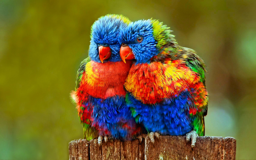

In [16]:
bird_img_urls = search_images('bird photos', max_images=1)
bird_img_url = bird_img_urls[0]
print(bird_img_url)
download_url(bird_img_url, 'bird.jpg', show_progress=False)
birth_img = Image.open('bird.jpg')
birth_img.to_thumb(256, 256)

Searching for 'forest photos'
http://wallpapercave.com/wp/6nUx8Ku.jpg


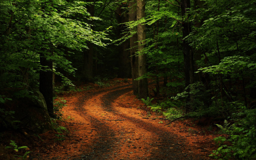

In [17]:
forest_img_urls = search_images('forest photos', max_images=1)
forest_img_url = forest_img_urls[0]
print(forest_img_url)
download_url(forest_img_url, 'forest.jpg', show_progress=False)
forest_img = Image.open('forest.jpg')
forest_img.to_thumb(256, 256)

In [20]:
searches = ['forest', 'bird']
path = Path('bird_or_not')

for search in searches:
    dest = (path/search)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{search} photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{search} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{search} shade photo'))
    sleep(10)
    resize_images(path/search, max_size=400, dest=path/search)


Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


#### Step 2: Train the Model

Remove images that failed to download correctly

In [21]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)